# 신경망의 이해 - 퍼셉트론

## #01. 준비작업

### 1. 패키지 참조하기


In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action="ignore")

from helper.util import *
from helper.plot import *

from tensorflow.keras.models import Sequential # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense      # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import SGD, RMSprop    # 옵티마이저
from tensorflow.keras.losses import mse        # OR게이트에서 사용할 활성화 함수

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## #02. AND 게이트

### [1] 데이터 가져오기

훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 이 예제는 훈련/검증 데이터를 분할하지 않음


In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/and.xlsx", info=False)

### [2] 독립, 종속 변수 분리


In [3]:
x = origin.drop(labels="target", axis=1)
y = origin["target"]
rows, cols = x.shape
rows, cols

(4, 2)

### [3] 훈련 모델 적합


In [4]:
model = Sequential()
# 1차원의 데이터를 입력으로 받고, cols개의 출력을 가지며 활성화 함수로 linear를 사용하는 첫 번째 Dense 층
model.add(Dense(1, input_shape=(cols,), activation="linear"))
model.compile(optimizer=SGD(), loss=mse, metrics=["acc"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

### [4] 학습하기


In [5]:
%%time
result = model.fit(x, y, epochs=500, verbose=0)
result

CPU times: total: 10.8 s
Wall time: 10.4 s


### [5] 학습 결과 

#### (1) 에폭별 정확도(acc)와 손실률(loss)


In [6]:
result_df = DataFrame(data=result.history)
result_df["epochs"] = result_df.index + 1
result_df

,acc,loss,epochs
0,0.5,0.630222,1
1,0.5,0.620474,2
2,0.5,0.611095,3
3,0.5,0.602062,4
4,0.5,0.593357,5
...,...,...,...
495,1.0,0.068460,496
496,1.0,0.068412,497
497,1.0,0.068364,498
498,1.0,0.068317,499


#### (2) 정확도, 손실률 시각화


In [7]:
rdf = result_df.melt(id_vars="epochs", var_name="metric", value_name="value")
rdf

,epochs,metric,value
0,1,acc,0.500000
1,2,acc,0.500000
2,3,acc,0.500000
3,4,acc,0.500000
4,5,acc,0.500000
...,...,...,...
995,496,loss,0.068460
996,497,loss,0.068412
997,498,loss,0.068364
998,499,loss,0.068317


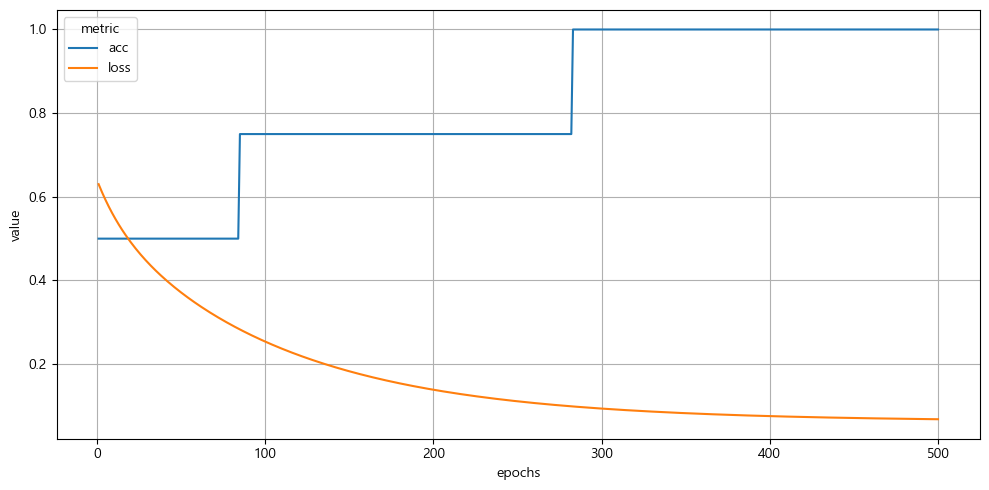

In [8]:
my_lineplot(df=rdf, xname="epochs", yname="value", hue="metric")

### [6] 모델 성능 평가

이 단계에서 검증 데이터를 활용해야 하지만 이 예제는 훈련/검증 데이터를 나누지 않았으므로 훈련데이터로 진행

In [9]:
ev = model.evaluate(x, y)
print("손실률: %0.2f%%, 정확도: %0.2f%%" % (ev[0], ev[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - acc: 1.0000 - loss: 0.0682
손실률: 0.07%, 정확도: 1.00%


### [7] 가중치, 편향 확인


In [10]:
weight, bias = model.get_weights()
print("가중치: %s" % weight)
print("편향: %s" % bias)

가중치: [[0.5002499]
 [0.3512404]]
편향: [-0.16192335]


### [8] 학습 결과 적용

#### (1) 단일 데이터에 대한 예측치 산정


In [11]:
for i in range(0, 2):
    for j in range(0, 2):
        r = model.predict(np.array([[i, j]]))
        print("입력: %d, %d => 출력: %0.2f" % (i, j, r[0][0]))
        print("%s AND %s => %s" % (bool(i), bool(j), bool(round(r[0, 0]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
입력: 0, 0 => 출력: -0.16
False AND False => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
입력: 0, 1 => 출력: 0.19
False AND True => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
입력: 1, 0 => 출력: 0.34
True AND False => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
입력: 1, 1 => 출력: 0.69
True AND True => True


#### (2) 학습 데이터 전체를 활용하여 예측값 만들기


In [12]:
r = model.predict(x)
r

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[-0.16192335],
       [ 0.33832657],
       [ 0.18931705],
       [ 0.68956697]], dtype=float32)

In [13]:
origin["pred"] = r.reshape(-1).round()
origin

,x1,x2,target,pred
0,0,0,0,-0.0
1,1,0,0,0.0
2,0,1,0,0.0
3,1,1,1,1.0


## #03. OR 게이트

### [1] 데이터 가져오기


In [14]:
origin = my_read_excel("https://data.hossam.kr/mldata/or.xlsx", info=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      4 non-null      int64
 1   x2      4 non-null      int64
 2   target  4 non-null      int64
dtypes: int64(3)
memory usage: 228.0 bytes
None

데이터프레임 상위 5개 행
+----+------+------+----------+
|    |   x1 |   x2 |   target |
|----+------+------+----------|
|  0 |    0 |    0 |        0 |
|  1 |    1 |    0 |        1 |
|  2 |    0 |    1 |        1 |
|  3 |    1 |    1 |        1 |
+----+------+------+----------+

데이터프레임 하위 5개 행
+----+------+------+----------+
|    |   x1 |   x2 |   target |
|----+------+------+----------|
|  0 |    0 |    0 |        0 |
|  1 |    1 |    0 |        1 |
|  2 |    0 |    1 |        1 |
|  3 |    1 |    1 |        1 |
+----+------+------+----------+

기술통계
+--------+---------+--------+---------+-------+-------+-------+-------+-------+-------+
|        |   count |   mean |     std |

### [2] 독립, 종속 변수 분리


In [15]:
x = origin.drop(labels="target", axis=1)
y = origin["target"]
rows, cols = x.shape
rows, cols

(4, 2)

### [3] 모델 적합


In [16]:
model = Sequential()
model.add(Dense(1, activation="linear", input_shape=(cols,)))
model.compile(optimizer=SGD(), loss=mse, metrics=["acc"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

### [4] 학습하기


In [17]:
%time
result = model.fit(x, y, epochs=500, verbose=0)
result

CPU times: total: 0 ns
Wall time: 0 ns


### [5] 학습 결과


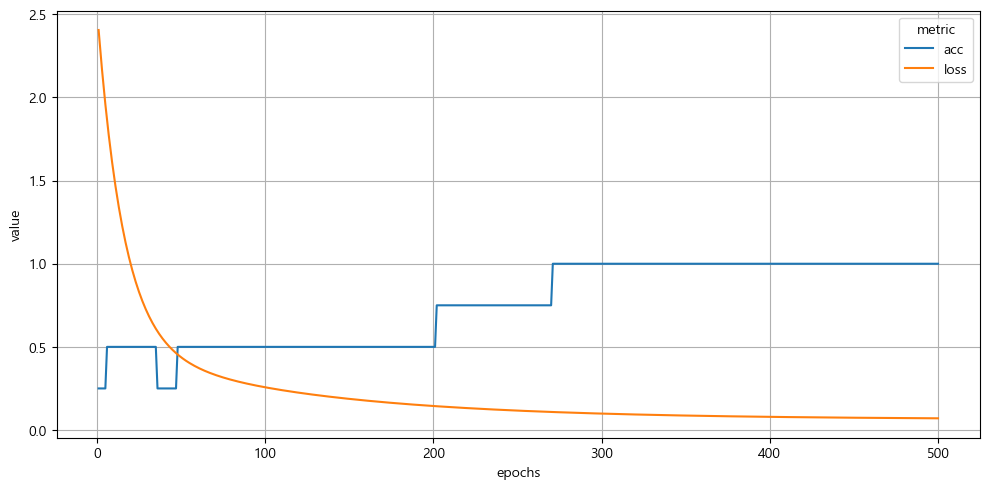

손실률: 0.07, 정확도: 1.00


In [18]:
result_df = DataFrame(result.history)
result_df["epochs"] = result_df.index + 1

rdf = result_df.melt(id_vars="epochs", var_name="metric", value_name="value")

my_lineplot(df=rdf, xname="epochs", yname="value", hue="metric")

ev = model.evaluate(x, y, verbose=0)
print("손실률: %0.2f, 정확도: %0.2f" % (ev[0], ev[1]))

### [6] 가중치, 편향


In [19]:
weight, bias = model.get_weights()
print("가중치: %s" % weight)
print("편향: %s" % bias)

가중치: [[0.3316803]
 [0.4640155]]
편향: [0.3711666]


### [7] 학습 결과 적용

##### 단일 데이터에 대한 예측치 산정


In [20]:
for i in range(0, 2):
    for j in range(0, 2):
        r = model.predict(np.array([[i, j]]))
        print("입력: %d, %d => 출력: %0.2f" % (i, j, r[0][0]))
        print("%s OR %s => %s" % (bool(i), bool(j), bool(round(r[0, 0]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
입력: 0, 0 => 출력: 0.37
False OR False => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
입력: 0, 1 => 출력: 0.84
False OR True => True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
입력: 1, 0 => 출력: 0.70
True OR False => True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
입력: 1, 1 => 출력: 1.17
True OR True => True


##### 학습 데이터 전체를 활용하여 예측값 만들기


In [21]:
r = model.predict(x, verbose=0)
origin["pred"] = r.reshape(-1).round()
origin

,x1,x2,target,pred
0,0,0,0,0.0
1,1,0,1,1.0
2,0,1,1,1.0
3,1,1,1,1.0


## #04. XOR 게이트

### [1] 데이터 가져오기


In [22]:
origin = my_read_excel("https://data.hossam.kr/mldata/xor.xlsx", info=False)

### [2] 독립, 종속 변수 분리


In [23]:
x = origin.drop(labels="target", axis=1)
y = origin["target"]
rows, cols = x.shape
rows, cols

(4, 2)

### [3] 훈련 모델 적합


In [24]:
model = Sequential()
# 층이 2인 경우 --> 정확도 75%
# 층이 4인 경우 --> 정확도 75%
# 층이 8인 경우 --> 정확도 100%
# 층이 16인 경우 --> 정확도 100%
model.add(Dense(16, input_shape=(cols,), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=RMSprop(), loss=mse, metrics=["acc"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

### [4] 학습 및 학습 결과 확인


CPU times: total: 0 ns
Wall time: 0 ns


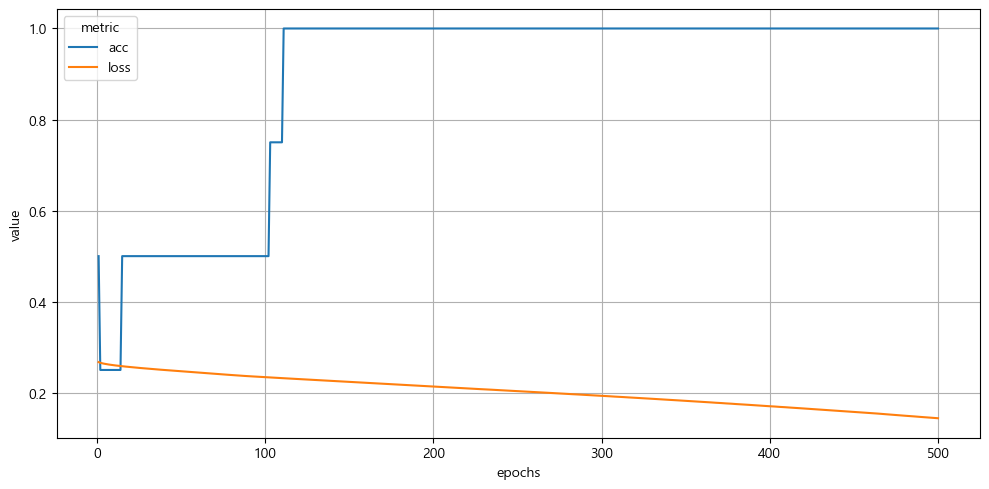

손실률: 0.14, 정확도: 1.00


In [25]:
%time
result = model.fit(x, y, epochs=500, verbose=0)

result_df = DataFrame(result.history)
result_df["epochs"] = result_df.index + 1

rdf = result_df.melt(id_vars="epochs", var_name="metric", value_name="value")

my_lineplot(df=rdf, xname="epochs", yname="value", hue="metric")

ev = model.evaluate(x, y, verbose=0)
print("손실률: %0.2f, 정확도: %0.2f" % (ev[0], ev[1]))

### [5] 가중치, 편향


In [26]:
weights = model.get_weights()
weights

[array([[-0.529198  , -0.4494946 , -0.784865  ,  0.38200298,  1.0275292 ,
         -0.5597341 , -0.07606941, -0.4807663 ,  0.3635298 , -0.00665158,
          0.27966374, -0.56053907,  0.07127014,  0.5418294 , -0.32972226,
         -0.07984763],
        [-0.41949868,  0.09477139,  0.7852908 ,  0.38267976, -0.04990401,
         -0.5434703 , -0.17550397, -0.00421047,  0.51454455, -0.01185876,
          0.20301308,  0.56097054, -0.1278555 , -0.3959996 , -0.11703628,
         -0.27688628]], dtype=float32),
 array([ 0.0000000e+00, -9.5593646e-02,  1.3899175e-04, -3.8176543e-01,
        -1.8513309e-03,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        -3.6452380e-01,  0.0000000e+00, -2.7571112e-01,  4.0348986e-04,
        -7.1792766e-02, -2.1721856e-03,  0.0000000e+00,  0.0000000e+00],
       dtype=float32),
 array([[ 0.55152106],
        [-0.42153913],
        [ 0.64493436],
        [-0.66072047],
        [ 0.6967426 ],
        [-0.11683801],
        [ 0.34302205],
        [ 0.55588937

In [27]:
# 2차원 배열 - 입력층과 은닉층을 연결하는 가중치
print(weights[0].shape)

# 1차원 배열 - 은닉층의 편향
print(weights[1].shape)

# 2차원 배열 - 은닉층과 출력층을 연결하는 가중치
print(weights[2].shape)

# 1차원 배열 - 출력층의 편향
print(weights[3].shape)

(2, 16)
(16,)
(16, 1)
(1,)


### [6] 학습 결과 적용

##### 단일 데이터에 대한 예측치 산정


In [28]:
for i in range(0, 2):
    for j in range(0, 2):
        r = model.predict(np.array([[i, j]]))
        print("입력: %d, %d => 출력: %0.2f" % (i, j, r[0][0]))
        print("%s OR %s => %s" % (bool(i), bool(j), bool(round(r[0, 0]))))

[scatterd] >WARNING> 5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000021499005E40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
입력: 0, 0 => 출력: 0.40
False OR False => False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
입력: 0, 1 => 출력: 0.64
False OR True => True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
입력: 1, 0 => 출력: 0.62
True OR False => True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
입력: 1, 1 => 출력: 0.37
True OR True => False


##### 학습 데이터 전체를 활용하여 예측값 만들기


In [29]:
r = model.predict(x, verbose=0)
origin["pred"] = r.reshape(-1).round()
origin

[scatterd] >WARNING> 5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000021499005E40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


,x1,x2,target,pred
0,0,0,0,0.0
1,1,0,1,1.0
2,0,1,1,1.0
3,1,1,0,0.0
